### Logistic Regression

### 연속형 자료인 기후 데이터와 범주형 데이터인 화재 결과(0과 1)의 관계 분석하기

### 독립변수와 종속변수 분리하고, 학습 데이터와 예측 데이터를 나눈다.

In [3]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_excel('./for_regression.xlsx')
display(df.head())

,주소,강수,강수형태,기온,뇌전,습도,풍속,풍향,하늘상태,화재발생
0,전라남도 영광군 낙월면,0.0,0.0,4.6,-1.0,89.0,0.6,270.0,-1,0
1,전라남도 영광군 낙월면,0.0,0.0,5.2,-1.0,81.0,1.2,277.0,-1,0
2,전라남도 영광군 낙월면,0.0,0.0,5.4,-1.0,74.0,1.5,266.0,-1,0
3,전라남도 영광군 낙월면,0.0,0.0,5.4,-1.0,77.0,1.5,276.0,-1,0
4,전라남도 영광군 낙월면,0.0,0.0,5.2,-1.0,75.0,0.4,222.0,-1,0


In [33]:
df['하늘상태'].astype(int)

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
69401   -1
69402   -1
69403   -1
69404   -1
69405   -1
Name: 하늘상태, Length: 69406, dtype: int32

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69406 entries, 0 to 69405
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   주소      69406 non-null  object 
 1   강수      69406 non-null  float64
 2   강수형태    69406 non-null  float64
 3   기온      69406 non-null  float64
 4   뇌전      69406 non-null  float64
 5   습도      69406 non-null  float64
 6   풍속      69406 non-null  float64
 7   풍향      69406 non-null  float64
 8   하늘상태    69406 non-null  int64  
 9   화재발생    69406 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.3+ MB


In [35]:
from sklearn.model_selection import train_test_split
 
# x(독립변수) y(종속 변수) 분리
x = df.loc[:, '강수':'하늘상태']
y = df['화재발생']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

52054
17352
52054
17352


### p-value를 확인

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
 
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
result = model.fit()
print(result.summary())

y_pred = log_reg.predict(x_test)
#print(y_pred)
#print(list(y_test))

print('정확도 :', metrics.accuracy_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:                   화재발생   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     829.0
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:56:16   Log-Likelihood:                -46944.
No. Observations:               69406   AIC:                         9.390e+04
Df Residuals:                   69398   BIC:                         9.398e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
강수             0.0128      0.002      5.429      0.0

C:\Users\juhee\anaconda3\envs\pydatavenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
# 10이상의 VIF factor는 VIF가 10보다 크면 다중공선성이 있다고 판단
# 하늘상태에서 강한 다중공선성을 확인할 수 있었음.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif["features"] = x2.columns
vif

,VIF Factor,features
0,1.196750,강수
1,1.330763,강수형태
2,1.034570,기온
3,2.589174,뇌전
4,1.146645,습도
5,2.474701,풍속
6,1.039535,풍향
7,26.621412,하늘상태


#### p-value값은 정규성 검증을 위해 사용되는 수치이다. P값은 아무런 관련이 없는데 유의미하게 나올 확률을 뜻한다. 
#### 즉, P값이 0.01이라면, 관련이 없는데 유의미하게 나올 확율이 1프로로 합리적인 변수로 판단할 수 있다. 
#### 눈으로 확인하기 쉽게 위 요약내용에서 P값이 0.05이하인 변수들 5개로만 학습을 시킨 모델과, P값이 1에 가까운 변수들로 합습을 시켜 정확도를 비교한다.

#### p값 < 0.05 학습모델
#### 기존에 모든 독립변수를 학습시켰다면 이번에는 p값이 0.05보다 작은 변수들로만 학습을 진행시켜 히트맵과 정확도를 확인한다.

In [38]:
df1.corr(method='pearson')

,강수,강수형태,기온,뇌전,습도,풍속,풍향,화재발생
강수,1.000000,0.368079,0.083165,-0.007826,0.154659,0.008936,-0.036569,-0.019855
강수형태,0.368079,1.000000,0.019993,0.298438,0.172791,0.181830,-0.044295,-0.018920
기온,0.083165,0.019993,1.000000,-0.029902,0.151590,-0.002362,0.028547,-0.111840
뇌전,-0.007826,0.298438,-0.029902,1.000000,-0.069852,0.759199,-0.034812,0.026340
습도,0.154659,0.172791,0.151590,-0.069852,1.000000,-0.172913,-0.172612,-0.251972
풍속,0.008936,0.181830,-0.002362,0.759199,-0.172913,1.000000,0.030201,0.005847
풍향,-0.036569,-0.044295,0.028547,-0.034812,-0.172612,0.030201,1.000000,-0.018338
화재발생,-0.019855,-0.018920,-0.111840,0.026340,-0.251972,0.005847,-0.018338,1.000000


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

In [24]:
df1 = df.drop(df.columns[[8]], axis=1)

In [26]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib
font_path = "data/210 M고딕040.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
print(plt.rcParams['font.family'])
matplotlib.font_manager._rebuild()
matplotlib.rcParams['axes.unicode_minus'] = False

['210 MGothic']


Matplotlib is building the font cache; this may take a moment.


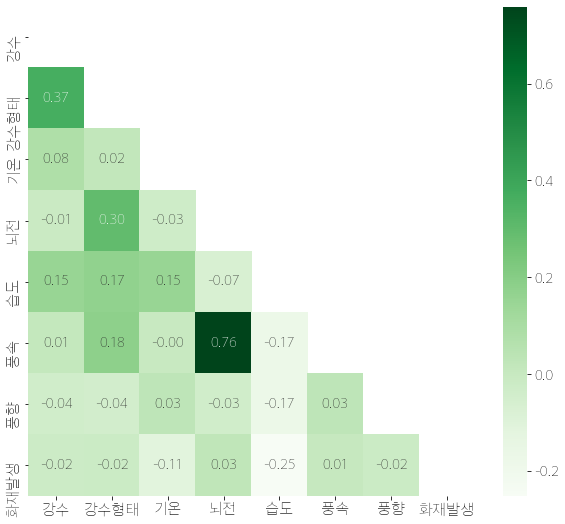

In [40]:
plt.figure(figsize=(10, 9))
plt.rc('font', size = 15)

mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (10,6) # 그림 크기 조정
sns.heatmap(data = df1.corr(), mask=mask, annot=True, fmt = '.2f', linewidths=0, cmap='Greens')
plt.savefig("data/heatmap.png")

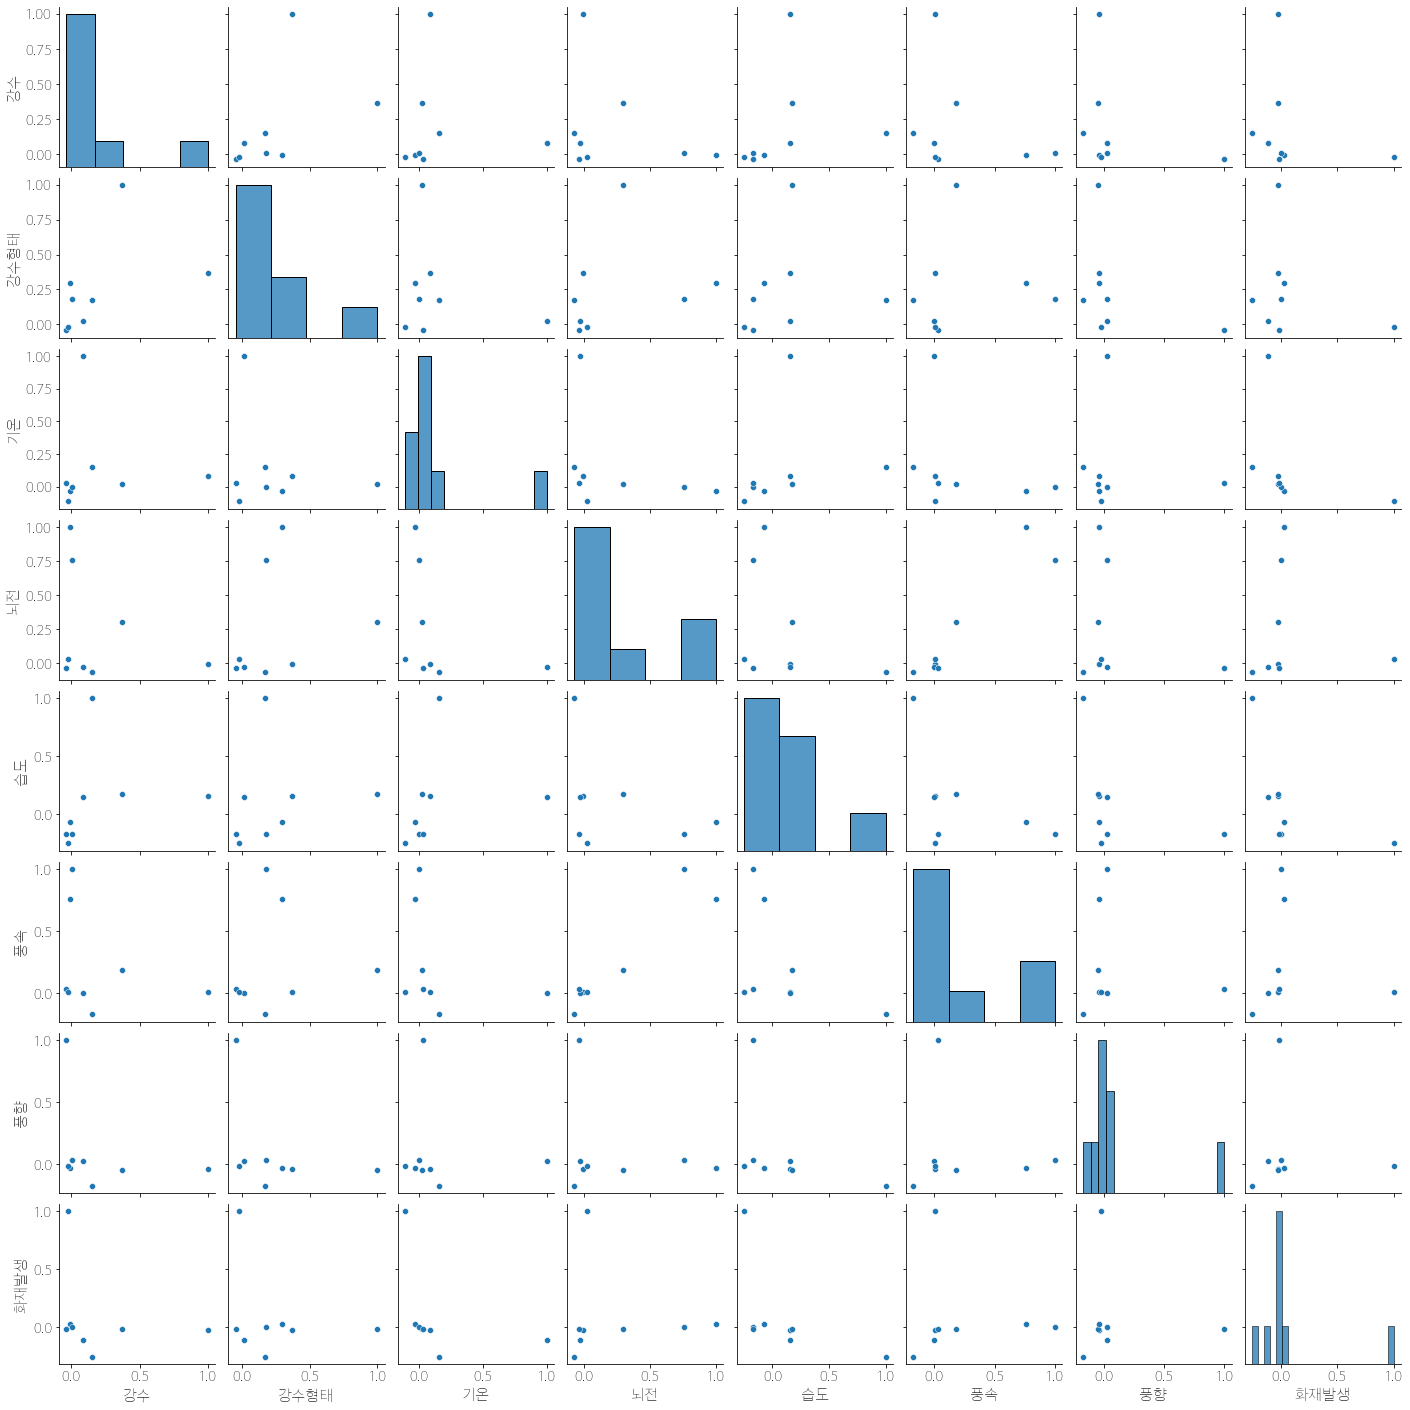

In [39]:
sns.pairplot(df1.corr(method='pearson'))
plt.savefig("data/corr1.png")
plt.show()